# COSC 311 Project 2 - Luke Scott

Part 1 - Wireless Indoor Localization Data Set

Task 1 - Load dataset

In [139]:
# Luke Scott
# COSC 311
# Project 2 - Part 1 - Task 1
# Dr. Wang

import numpy as np
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
from warnings import simplefilter
import seaborn as sns; sns.set()
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

pca = PCA()

simplefilter(action='ignore', category=FutureWarning)

wifi = pd.read_fwf('wifi_localization.txt', header=None,
                   names=['s1', 's2', 's3', 's4', 's5', 's6', 's7', 'room'])

X = wifi[['s1', 's2', 's3', 's4', 's5', 's6', 's7']].values

Y = wifi['room'].values

Y[Y == 1] = 1
Y[Y == 2] = 2
Y[Y == 3] = 3
Y[Y == 4] = 4

print(wifi.room)

0       1
1       1
2       1
3       1
4       1
       ..
1995    4
1996    4
1997    4
1998    4
1999    4
Name: room, Length: 2000, dtype: int64


Task 2 - Calculations

I output the centers of each cluster in correspondance to the room.  Then I plotted a scatter plot to show the cluster centers for the rooms.

Centers for room 1 : [-62.482 -56.312 -60.566 -64.204 -70.278 -82.956 -84.072] 
Centers for room 2 : [-49.17102967 -55.15881326 -53.29144852 -50.03839442 -64.04537522
 -80.94240838 -81.85340314] 
Centers for room 3 : [-35.43058824 -55.93411765 -55.72470588 -36.69411765 -67.32235294
 -71.59294118 -72.56941176] 
Centers for room 4 : [-60.13346614 -55.20517928 -50.64940239 -61.28286853 -49.46613546
 -87.02191235 -86.99800797]


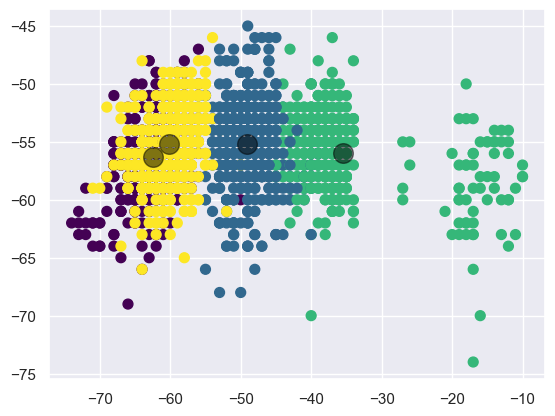

In [140]:
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)

    i = rng.permutation(X.shape[0])[:n_clusters] 
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
  
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
centers, labels = find_clusters(X, 4)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_
print('Centers for room 1 :', centers[0],
     '\nCenters for room 2 :', centers[1],
     '\nCenters for room 3 :', centers[2],
     '\nCenters for room 4 :', centers[3],)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

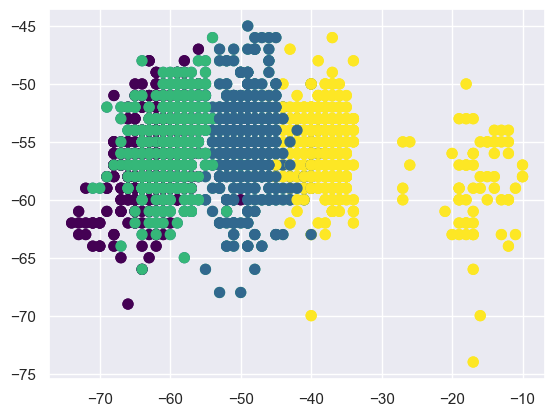

In [141]:
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
       
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We got 1508 wrong!


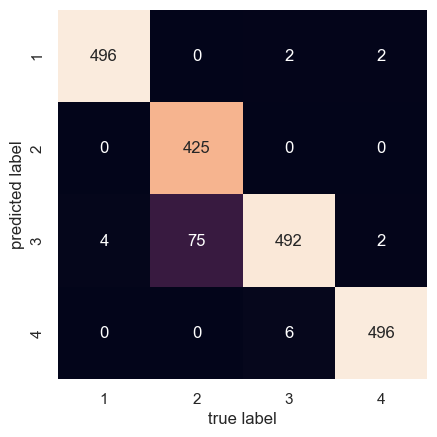

In [153]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(Y[mask])[0]
    
accuracy_score(Y, labels)

mat = confusion_matrix(Y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(1, 5),
            yticklabels=range(1, 5))
plt.xlabel('true label')
plt.ylabel('predicted label')

num_wrong = np.sum(np.not_equal(clusters,Y))
print(f'We got {num_wrong} wrong!')

Part 2 - UCI ML Hand-Written digits dataset

Task 1 - Conduct PCA analysis

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]
Train score after PCA 0

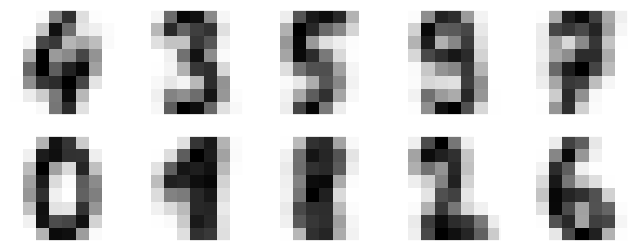

In [46]:
digits = load_digits()
digits.data.shape
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

X = digits.data
Y = digits.target

X_new = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components = 3)
X_new=pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, Y, test_size = 0.3, random_state=20, stratify=Y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

Task 2 - Transform data set

After testing the PCA with 3 components, I was only able to achieve 84% variance.  I adjusted this to 5 components and was able to achieve 94% variance.  Than I transformed the data into 5 dimensions for the next task.

In [47]:
pca = PCA(n_components = 5)
X_new=pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, Y, test_size = 0.3, random_state=20, stratify=Y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

pca.get_covariance()
print(pca.explained_variance_ratio_)

Train score after PCA 0.9419252187748608 %
Test score after PCA 0.9074074074074074 %
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415]


Task 3 - Build classification model

For this task, I decided to use the DecisionTreeClassifier algorithm and used 10 folds for the CVT.  The average accuracy for the CVT was around 84% which was a good outcome.  Most digits were predicted correctly.

accuracy of each fold - [0.8444444444444444, 0.8444444444444444, 0.8407407407407408, 0.8518518518518519, 0.8518518518518519, 0.8351851851851851, 0.8407407407407408, 0.8407407407407408, 0.8444444444444444, 0.8407407407407408]
Avg accuracy : 0.8435185185185186
Avg accuracy: 0.8286312849162011


Text(110.44999999999997, 0.5, 'predicted label')

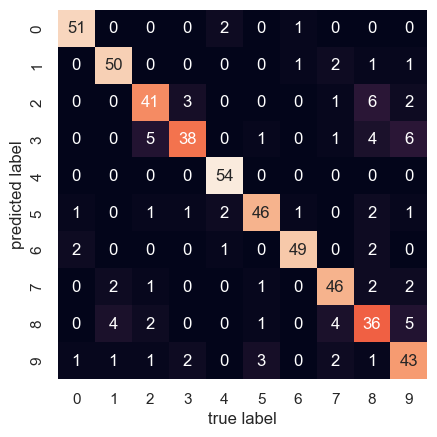

In [48]:
k = 10
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy')

acc_score = []

for train_index , test_index in kf.split(X):
    DT.fit(X_train_new, y_train)
    pred_values = DT.predict(X_test_new)
    
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

result = cross_val_score(DT , X, Y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

mat = confusion_matrix(pred_values, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Part 3 - Housing Data Set

Task 1 - Find Correlations  Using the matrix below, I decided to use the 3 variables with the highest correlation coefficient, 'housing_median_age' 'total_rooms', and 'median_income'.

<AxesSubplot:>

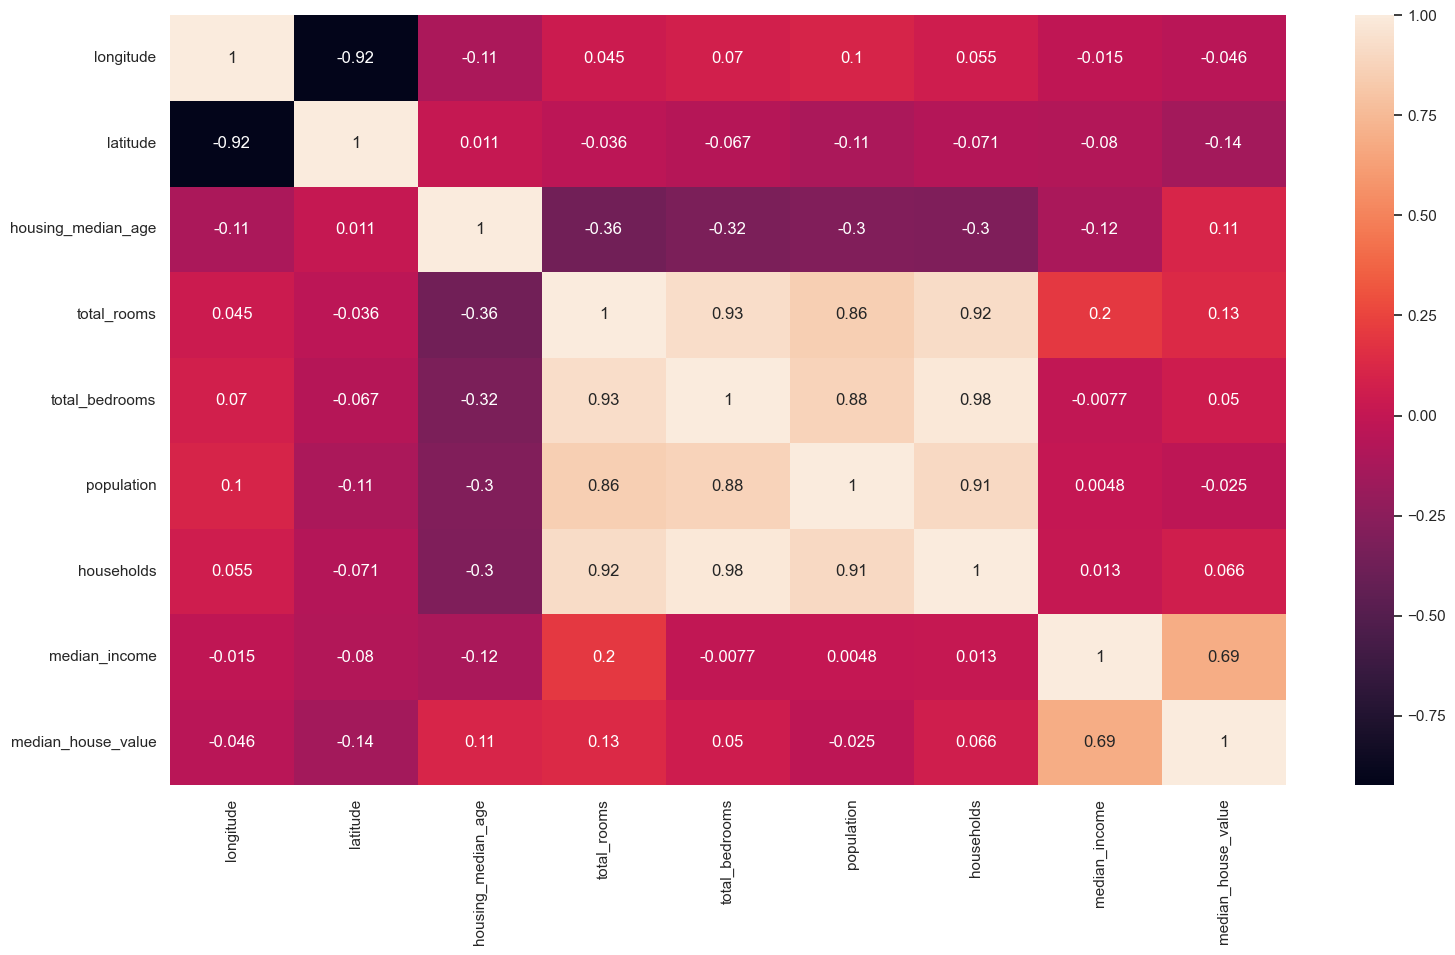

In [49]:
corrdat = housing_data.corr()
corrdat
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

In [50]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    corr_df = pd.DataFrame(data = value, index = feature, 
                           columns = ['corr value'])
    return corr_df

In [51]:
threshold = 0.1
corr_value = getCorrelatedFeature(corrdat['median_house_value'],threshold)

CD = housing_data[corr_value.index]
CD.head()

latitude
housing_median_age
total_rooms
median_income
median_house_value


,latitude,housing_median_age,total_rooms,median_income,median_house_value
0,37.88,41.0,880.0,8.3252,452600.0
1,37.86,21.0,7099.0,8.3014,358500.0
2,37.85,52.0,1467.0,7.2574,352100.0
3,37.85,52.0,1274.0,5.6431,341300.0
4,37.85,52.0,1627.0,3.8462,342200.0


Task 2 - Splitting Samples

In [88]:
X = housing_data.drop(labels = ['latitude','longitude',
                                'median_house_value','ocean_proximity',
                               'index','level_0','total_bedrooms',
                               'households','population'], axis = 1)
y = CD['median_house_value']
print(X)
print(y)

       housing_median_age  total_rooms  median_income
0                    41.0        880.0         8.3252
1                    21.0       7099.0         8.3014
2                    52.0       1467.0         7.2574
3                    52.0       1274.0         5.6431
4                    52.0       1627.0         3.8462
...                   ...          ...            ...
20635                25.0       1665.0         1.5603
20636                18.0        697.0         2.5568
20637                17.0       2254.0         1.7000
20638                18.0       1860.0         1.8672
20639                16.0       2785.0         2.3886

[20640 rows x 3 columns]
0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


Task 3 - Perform Multiple Linear Regression

In [89]:
X_train, X_test , y_train, y_test = \
    train_test_split(X, y, test_size = 0.4, random_state = 0 )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

model = LinearRegression()
model
model.fit(X_train, y_train)
predict = model.predict(X_test)
compare1 = pd.DataFrame({"Predicted":predict, "Actual":y_test})

In [90]:
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

print("The performance for testing set")
print("-------------------------------")
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)

The performance for testing set
-------------------------------
MAE is  60378.62097652892
MSE is  6607470379.44292
RMSE is  81286.34805084381
